In [1]:
import os

import scipy
from scipy import stats
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.pyplot import figure

## Загрузка данных

In [2]:
paths = glob.glob(f"t1_statistic_32/*results*.csv")

In [3]:
data = pd.DataFrame()

for path in paths:
    item = pd.read_csv(path, skiprows=12, names=['name', 'E'])
    data = pd.concat((data, item), ignore_index=True)

## Первичная статистика ускорителя

In [4]:
l = len(data)
res = []
for name in set(data['name']):
    count = len(data[data['name'] == name])
    res.append((name, count, count/l*100))
pd.DataFrame(res, columns=['name', 'count', 'percent'])

,name,count,percent
0,gamma,184684,87.158674
1,e+,771,0.363861
2,anti_nu_e,589,0.277969
3,nu_e,583,0.275138
4,proton,1111,0.524319
5,e-,21247,10.027183
6,O16,738,0.348287
7,O18,4,0.001888
8,N15,1,0.000472
9,neutron,2166,1.022209


In [6]:
res = []
tot_energy = sum(data['E'])
for name in set(data['name']):
    particles = data[data['name'] == name]
    en = sum(particles['E'])
    res.append((name, en/len(particles), en/tot_energy*100))
pd.DataFrame(res, columns=['name', 'avg_particle_energy', 'total_percent'])

,name,avg_particle_energy,total_percent
0,gamma,3.312086,95.421935
1,e+,2.789159,0.335463
2,anti_nu_e,0.307165,0.028223
3,nu_e,0.557158,0.050672
4,proton,0.022691,0.003933
5,e-,1.211400,4.015157
6,O16,0.000000,0.000000
7,O18,0.000000,0.000000
8,N15,0.000000,0.000000
9,neutron,0.428002,0.144618


## Распределение по энергиям (взяты только гамма и электроны)

In [7]:
def get_energy_count_bins(d, bins=100):
    n, e = np.histogram(d['E'], bins)
    return e[:-1], n

In [12]:
names_particle = data[data['name'] == 'gamma']
max(names_particle['E'])

23.4702

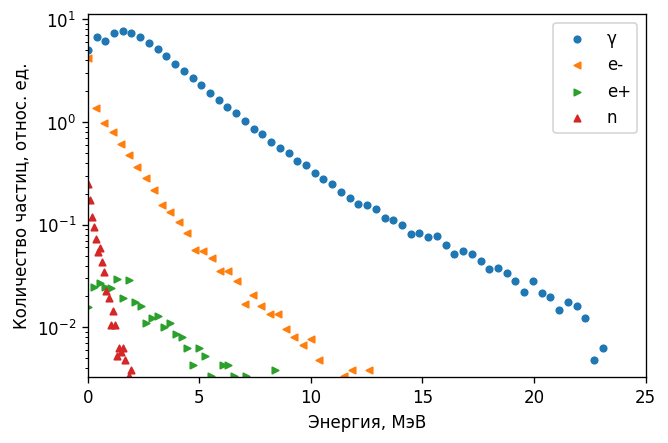

In [33]:
plt.figure(figsize=(6, 4), dpi=120)
           
tot = 0
for lbl, pname in zip(['γ', 'e-', 'e+', 'n'],
                      ['gamma', 'e-', 'e+', 'neutron']):
    names_particle = data[data['name'] == pname]
    tot += len(names_particle)
    
    
for mkr, lbl, pname in zip(['o', '<', '>','^'],
                      ['γ', 'e-', 'e+', 'n'],
                      ['gamma', 'e-', 'e+', 'neutron']):
    names_particle = data[data['name'] == pname]
    energys, counts = get_energy_count_bins(names_particle, 60)
    plt.scatter(energys, counts/tot*100, s=15, label=lbl, marker=mkr)

plt.legend()
plt.xlim([0, 25.01])
plt.yscale('log')
plt.ylabel('Количество частиц, относ. ед.')
plt.xlabel('Энергия, МэВ')
plt.show()

In [51]:
for pname in ['gamma', 'e-', 'e+', 'proton', 'neutron']:
    names_particle = data[data['name'] == pname]
    energys, counts = get_energy_count_bins(names_particle, 40)
    with open(f'linac_{pname}_hist.txt', 'w') as f:
        for e, w in zip(energys, counts):
            f.write(f'{e} {w}\n')

In [52]:
# particles = data[data['name'] == 'gamma']
# plt.hist(particles['E'], bins=100, density=True)
# plt.xlim([0, 15.1])
# plt.ylabel('Процент числа частиц, %')
# plt.xlabel('Энергия электронов, МэВ')
# plt.yscale('log')
# plt.show()

# Подвал

## Распределение по координатам

In [ ]:
# center = data[(-5 < data['x']) & (data['x'] < 5) & (-5 < data['y']) & (data['y'] < 5)]
# plt.rcParams["figure.figsize"] = (6,6)
# plt.hist2d(center['x'], center['y'], bins=30)
# plt.title('Плотность частиц на выходе из коллиматора')
# plt.xlabel('Координата X, см')
# plt.ylabel('Координата Y, см')
# plt.show()

## Распределение по скоростям

In [ ]:
# plt.scatter(center_gamma['vx'], center_gamma['vy'], s=0.2)
# plt.xlim([-2, 2])
# plt.ylim([-2, 2])
# plt.title('Гамма')
# plt.xlabel('x компонента скорости, (см/с ?)')
# plt.ylabel('y компонента скорости, (см/с ?)')
# plt.show()

In [ ]:
# plt.scatter(center_e['vx'], center_e['vy'], s=0.2)
# plt.xlim([-2, 2])
# plt.ylim([-2, 2])
# plt.title('Электроны')
# plt.xlabel('x компонента скорости, (см/с ?)')
# plt.ylabel('y компонента скорости, (см/с ?)')
# plt.show()

## Визуализация векторов скоростей

In [ ]:
# to_viz = center_gamma[['x','y','z', 'vx','vy','vz']]

In [ ]:
# to_viz = to_viz[:500].T.to_numpy()
# to_viz.shape

In [ ]:
# X, Y, Z, U, V, W = [to_viz[cor_vel] for cor_vel in range(len(to_viz))]
# fig = plt.figure()
# ax3d = fig.add_subplot(111, projection='3d')
# ax3d.set_proj_type('persp')
# ax3d.quiver(X, Y, Z, U, V, W)
# ax3d.set_xlim([-4, 4])
# ax3d.set_ylim([-4, 4])
# ax3d.set_zlim([40, 50])
# plt.show()

In [ ]:
# import matplotlib.pyplot as plt
# import numpy as np

# fig = plt.figure()
# ax = fig.add_subplot(projection='3d')
# x, y = center['x'], center['y']
# hist, xedges, yedges = np.histogram2d(x, y, bins=16, range=[[-5, 5], [-5, 5]])

# # Construct arrays for the anchor positions of the 16 bars.
# xpos, ypos = np.meshgrid(xedges[:-1] + 0.25, yedges[:-1] + 0.25, indexing="ij")
# xpos = xpos.ravel()
# ypos = ypos.ravel()
# zpos = 0

# # Construct arrays with the dimensions for the 16 bars.
# dx = dy = 0.5 * np.ones_like(zpos)
# dz = hist.ravel()

# ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average')

# plt.show()